## Knn

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df_training = pd.read_csv("data_mod/train_motion_data.csv")
df_test = pd.read_csv("data_mod/test_motion_data.csv")

df_training

,AccX,AccY,Class,DiffAccX,DiffAccY
0,0.000000,0.000000,NORMAL,0.000000,0.000000
1,-1.624864,-1.082492,NORMAL,-1.624864,-1.082492
2,-0.594660,-0.122410,NORMAL,1.030204,0.960082
3,0.738478,-0.228456,NORMAL,1.333138,-0.106046
4,0.101741,0.777568,NORMAL,-0.636737,1.006023
...,...,...,...,...,...
3411,0.915688,-2.017489,SLOW,2.374675,-1.824629
3412,-1.934203,0.914925,SLOW,-2.849891,2.932414
3413,-0.222845,0.747304,SLOW,1.711359,-0.167621
3414,-0.349423,0.067261,SLOW,-0.126579,-0.680043


In [34]:
df_training.isna().sum()

AccX        0
AccY        0
Class       0
DiffAccX    0
DiffAccY    0
dtype: int64

### Change categories to numbers

In [35]:
df_training = df_training.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_test = df_test.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_training

,AccX,AccY,Class,DiffAccX,DiffAccY
0,0.000000,0.000000,0,0.000000,0.000000
1,-1.624864,-1.082492,0,-1.624864,-1.082492
2,-0.594660,-0.122410,0,1.030204,0.960082
3,0.738478,-0.228456,0,1.333138,-0.106046
4,0.101741,0.777568,0,-0.636737,1.006023
...,...,...,...,...,...
3411,0.915688,-2.017489,2,2.374675,-1.824629
3412,-1.934203,0.914925,2,-2.849891,2.932414
3413,-0.222845,0.747304,2,1.711359,-0.167621
3414,-0.349423,0.067261,2,-0.126579,-0.680043


### Normalize the data

In [36]:
X_train = df_training.drop(columns=["Class"])
X_train = (X_train - X_train.mean()) / X_train.std() * 100

X_train["Class"] = df_training["Class"]
X_train

,AccX,AccY,DiffAccX,DiffAccY,Class
0,-2.090819,8.424269,0.012037,-0.012577,0
1,-195.187234,-134.475048,-166.006943,-114.501443,0
2,-72.759319,-7.735009,105.272186,101.529709,0
3,85.668834,-21.734057,136.224200,-11.228412,0
4,9.999939,111.070663,-65.045995,106.388643,0
...,...,...,...,...,...
3411,106.728131,-257.903714,242.642233,-192.992960,2
3412,-231.948681,129.203106,-291.172960,310.131807,2
3413,-28.573341,107.075511,174.868553,-17.740887,2
3414,-43.615750,17.303333,-12.921013,-71.936747,2


In [37]:
X_testing = df_test.drop(columns="Class")
X_testing = (X_testing - X_testing.mean()) / X_testing.std() * 100

X_testing["Class"] = df_test["Class"]
X_testing

,AccX,AccY,DiffAccX,DiffAccY,Class
0,67.345100,-9.509000,-0.021340,-0.012385,1
1,57.982946,10.303100,-8.494392,16.758078,1
2,270.452050,-824.010358,192.270076,-706.238535,1
3,229.805029,-828.171460,-36.808209,-3.534656,1
4,283.133326,-732.402479,48.242495,81.053740,1
...,...,...,...,...,...
3079,-84.712435,-57.627689,-73.609489,-1.097380,2
3080,145.444037,51.068429,208.277716,91.996249,2
3081,121.268079,-177.287100,-21.901364,-193.309813,2
3082,83.265000,79.069807,-34.415357,216.987532,2


### Balance data

Class 0: 965
Class 1: 965
Proportion: 1.0 : 1


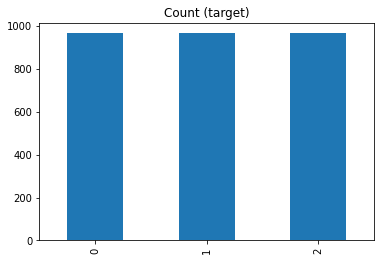

In [38]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X_train.drop(columns="Class"), X_train["Class"])

target_count = y_rus.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

## Train model

In [39]:
X_training  = X_rus
y_training  = y_rus

X_test = X_testing.drop(columns="Class")
y_test = X_testing.Class

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [41]:
Kneigh = KNeighborsClassifier(weights="uniform")

param_grid = {'n_neighbors': np.arange(1, 200), 'leaf_size': np.arange(20, 40)}

knn_gscv = GridSearchCV(Kneigh, param_grid, cv=5, verbose=10, n_jobs=10)
knn_gscv.fit(X_training, y_training)

Fitting 5 folds for each of 3980 candidates, totalling 19900 fits
[CV 3/5; 1/3980] START leaf_size=20, n_neighbors=1..............................
[CV 3/5; 1/3980] END leaf_size=20, n_neighbors=1;, score=0.316 total time=   0.0s
[CV 1/5; 2/3980] START leaf_size=20, n_neighbors=2..............................
[CV 1/5; 1/3980] START leaf_size=20, n_neighbors=1..............................
[CV 1/5; 2/3980] END leaf_size=20, n_neighbors=2;, score=0.328 total time=   0.0s
[CV 1/5; 1/3980] END leaf_size=20, n_neighbors=1;, score=0.335 total time=   0.0s
[CV 2/5; 1/3980] START leaf_size=20, n_neighbors=1..............................
[CV 1/5; 3/3980] START leaf_size=20, n_neighbors=3..............................
[CV 2/5; 1/3980] END leaf_size=20, n_neighbors=1;, score=0.349 total time=   0.0s
[CV 5/5; 1/3980] START leaf_size=20, n_neighbors=1..............................
[CV 1/5; 3/3980] END leaf_size=20, n_neighbors=3;, score=0.323 total time=   0.0s
[CV 2/5; 3/3980] START leaf_size=20, n

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=10,
             param_grid={'leaf_size': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]),
                         'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  6...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199])},
             verbose=10)

In [42]:
best_params = knn_gscv.best_params_
best_params

{'leaf_size': 20, 'n_neighbors': 60}

In [43]:
knn_gscv.best_score_

0.40794473229706385

In [44]:
knn_gscv.score(X_test, y_test)

0.4361219195849546

In [45]:
classes = ["NORMAL", "AGGRESIVE", "SLOW"]

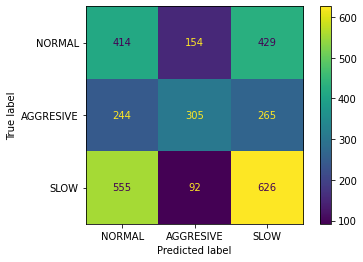

In [46]:
y_pred = knn_gscv.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=classes)
display.plot()

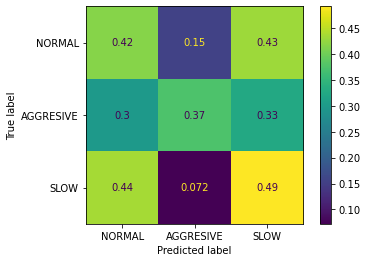

In [47]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=classes)
display.plot()

In [62]:
from sklearn.ensemble import BaggingClassifier

knn_bagging = BaggingClassifier(knn_gscv.best_estimator_, max_samples=0.7, max_features=0.5, random_state=0)
knn_bagging.fit(X_training, y_training)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=20,
                                                      n_neighbors=60),
                  max_features=0.5, max_samples=0.7, random_state=0)

In [63]:
knn_bagging.score(X_test, y_test)

0.44422827496757455

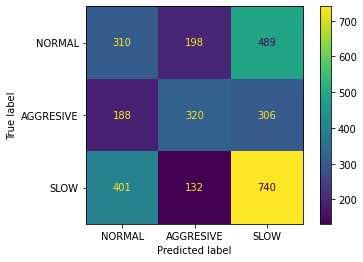

In [64]:
y_pred = knn_bagging.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=classes)
display.plot()

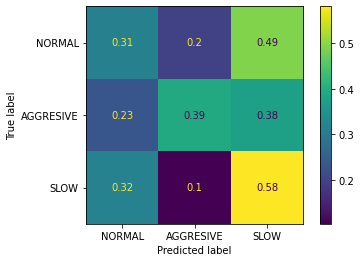

In [65]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=classes)
display.plot()

In [66]:
def evaluate(model, test_features, test_labels):
    accuracy = model.score(test_features, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    
    return accuracy

bagging_accuracy = evaluate(knn_bagging, X_test, y_test)

best_random = knn_gscv.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print(f'Improvement of {100 * (bagging_accuracy - random_accuracy) / random_accuracy:.3f}%.')

Model Performance
Accuracy = 0.444%.
Model Performance
Accuracy = 0.436%.
Improvement of 1.859%.
